# Final Project: Credit Card Fraud Detection

## Introduction

In today’s digital economy, credit card transactions are a cornerstone of financial activity but are increasingly vulnerable to fraud, costing billions annually. Traditional fraud detection methods, such as manual reviews and rule-based systems, struggle to keep pace with the complexity and volume of modern fraudulent activities.

This project aims to develop a machine learning-based credit card fraud detection system to identify and prevent fraudulent transactions. By analyzing transaction data, the system will classify legitimate and suspicious activities, focusing on minimizing false positives and false negatives. Various algorithms, including logistic regression, decision trees, and neural networks, will be evaluated to determine the most effective model.

This report outlines the data preparation, model development, and evaluation process, emphasizing the critical role of machine learning in enhancing financial security and reducing fraud risks.

## Steps for Working with Datasets

1. **Data Collection**: Gather relevant data from sources like databases or APIs.
1. **Exploratory Data Analysis (EDA)**: Understand data patterns, distributions, and detect outliers.
1. **Data Cleaning**: Handle missing values, correct errors, and remove duplicates.
1. **Feature Engineering**: Create or transform features to improve model performance.
1. **Data Splitting**: Divide data into training, validation, and testing sets.
1. **Model Training**: Fit the machine learning model using the training data.
1. **Model Evaluation**: Assess performance using metrics like accuracy, precision, and recall.
1. **Model Optimization**: Tune hyperparameters and apply techniques to improve accuracy.
1. **Deployment**: Integrate the model into a real-world application for predictions.
1. **Monitoring**: Continuously track performance and update the model as needed.

In this project, we already have the dataset, so we are going to work with: data cleaning, exploratory data analysis (which includes data visualization), data splitting, model training, and model evaluation.

## Import the needed libraries

In [3]:
# These libraries are previously installed in the environment.
# Check the README.md file for more information.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Import and organize the dataset

In [4]:
# Create the dataframe from the imported CSV file
df = pd.read_csv('dataset/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Cleaning

### Missing values

In [5]:
# Check the missing values
print(df.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [16]:
# Drop the missing values
df=df.dropna() 

# Check the missing values again
print(df.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### Duplicates

In [6]:
# Check the duplicates
print(df.duplicated().sum())

1081


In [7]:
# Drop the duplicates
df=df.drop_duplicates()

# Check the duplicates again
print(df.duplicated().sum())

0


## Exploratory Data Analysis (EDA)

**Question 1**: What is the percentage of fraudulent transactions in the dataset?

In [8]:
# Calculate the percentage of fraud cases
fraud_percentage = (df['Class'].sum() / len(df)) * 100

# Print the percentage of fraud cases
print(f"The percentage of fraud cases is {fraud_percentage:.2f}%")

The percentage of fraud cases is 0.17%


**Question 2**: What is the average amount of fraudulent transactions?

In [9]:
# Calculate the average amount of fraud cases
fraud_data = df[df['Class'] == 1]
average_fraud_amount = fraud_data['Amount'].mean()

# Print the average amount of fraud cases
print(f"The average amount of fraud cases is ${average_fraud_amount:.2f}")

The average amount of fraud cases is $123.87


### Data Visualization

**Question 1**: How many fraudulent transactions are there compared to non-fraudulent ones? (Use a bar graph)

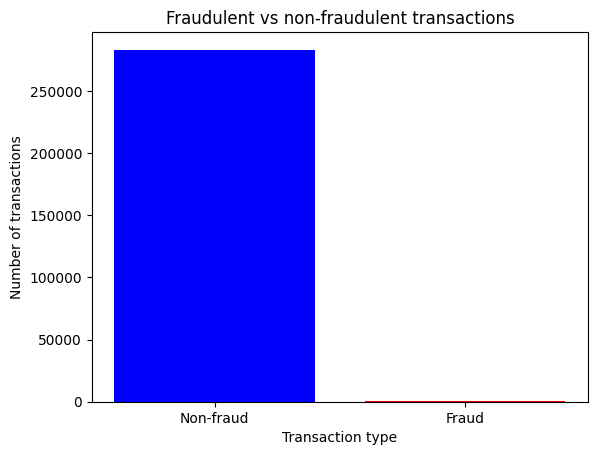

In [10]:
# Calculate the average amount of fraud and non-fraud cases
fraud_counts = df['Class'].value_counts()

# Plot the bar chart
plt.bar(['Non-fraud', 'Fraud'], fraud_counts, color=['blue', 'red'])
plt.xlabel('Transaction type')
plt.ylabel('Number of transactions')
plt.title('Fraudulent vs non-fraudulent transactions')
plt.show()

**Question 2**: What is the distribution of fraudulent transaction amounts? (Use a histogram)

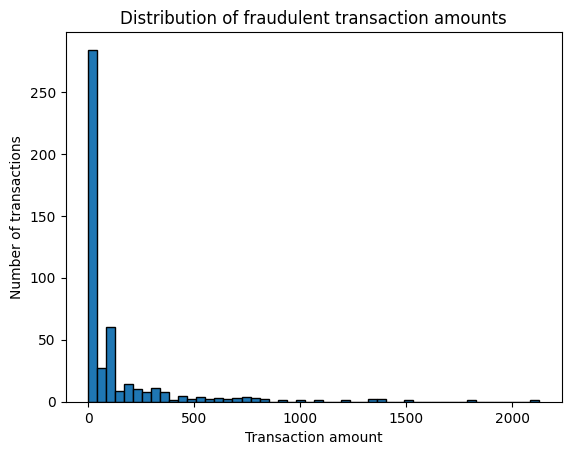

In [11]:
# Extract the fraud data
fraud_data = df[df['Class'] == 1]

# Plot the histogram
plt.hist(fraud_data['Amount'], bins=50, edgecolor='black')
plt.xlabel('Transaction amount')
plt.ylabel('Number of transactions')
plt.title('Distribution of fraudulent transaction amounts')
plt.show()

Using a boxplot to have an overview of the fraudulent and non-fraudulent transaction amounts:

<Axes: xlabel='Class', ylabel='Amount'>

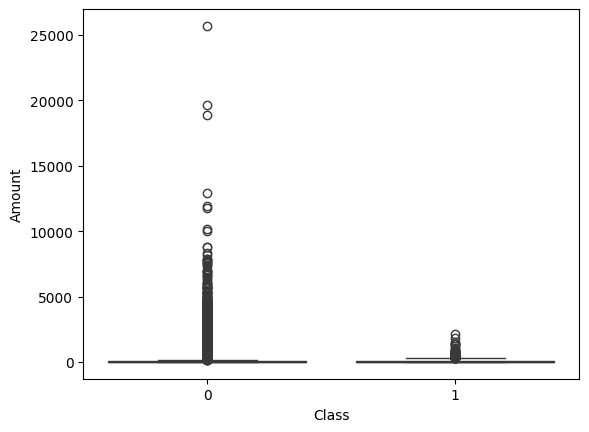

In [12]:
# Plot the boxplot
sns.boxplot(x='Class', y='Amount', data=df, showfliers=True, palette='viridis')

## Working with the Model

### Data Splitting

In [ ]:
# Separate the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X = df.drop('Class', axis=1)
y = df.Class
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Train and Evaluate the Model

#### Support Vector Classifier (time lapsed: 9m 20.5s)

In [ ]:
# Train the model
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train, y_train)
print(model_svc.score(X_train,y_train))
print(model_svc.score(X_test,y_test))
y_predict = model_svc.predict(X_test)


0.9996827914353688
0.9995065731505305


In [43]:
# Evaluate the model
from sklearn.metrics import classification_report , confusion_matrix

cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['fraudulent', 'normal'],columns=['Fraudulent prediction','Normal prediction'])

print("\nCONFUSION MATRIX:")
print(confusion)

print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_predict))


CONFUSION MATRIX:
            Fraudulent prediction  Normal prediction
fraudulent                     60                 27
normal                          1              56658

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.98      0.69      0.81        87

    accuracy                           1.00     56746
   macro avg       0.99      0.84      0.91     56746
weighted avg       1.00      1.00      1.00     56746



### Trying more Models

#### Logistic Regression (time lapsed: 0.5s)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}')


Logistic Regression Accuracy: 0.9991893701758714


#### Random Forrest Classifier (time lapsed: 4m 22.2s)

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)
print(f'Random Forest Classifier Accuracy: {accuracy_score(y_test, y_pred_rf_clf)}')


Random Forest Classifier Accuracy: 0.9995594403129736


#### Neural Network Model (using TensorFlow, time lapsed: 2m 6.0s)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
tf_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Step 5: Evaluate the Model
loss, accuracy = tf_model.evaluate(X_test, y_test)
print(f'TensorFlow Model Accuracy: {accuracy}')

Epoch 1/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9985 - loss: 0.0160 - val_accuracy: 0.9993 - val_loss: 0.0040
Epoch 2/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.9994 - val_loss: 0.0039
Epoch 3/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9994 - val_loss: 0.0038
Epoch 4/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9994 - val_loss: 0.0042
Epoch 5/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9994 - val_loss: 0.0041
Epoch 6/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9994 - val_loss: 0.0047
Epoch 7/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 0.9994 - val_loss: 0.0053
Epoch 8/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9995 - loss: 0

#### Neural Network Model (using PyTorch, time lapsed: 2m 43.7s)

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Build and Train the Model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

pt_model = NeuralNetwork()
criterion = nn.BCELoss()
optimizer = optim.Adam(pt_model.parameters(), lr=0.001)

# Training loop
for epoch in range(10):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = pt_model(X_batch).squeeze()
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

# Evaluate the Model
with torch.no_grad():
    y_pred_test = pt_model(X_test_tensor).squeeze()
    y_pred_test = (y_pred_test >= 0.5).float()
    accuracy = (y_pred_test == y_test_tensor).float().mean()
    print(f'PyTorch Model Accuracy: {accuracy.item()}')

PyTorch Model Accuracy: 0.999259889125824


#### Gradient Boosting Model (using XGBoost, time lapsed: 1.6s)

In [21]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Build and Train the Model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Model Accuracy: {accuracy}')

XGBoost Model Accuracy: 0.9995065731505305
